In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('data/aggregated_df.csv')
df.columns

Index(['match_id', 'inning', 'bowling_team', 'batter', 'batter_total_balls',
       'batter_SR', 'batter_score', 'dismissal_kind', 'date', 'match_type',
       'venue', 'no_of_right_arm_pacers_faced', 'no_of_left_arm_pacers_faced',
       'no_of_right_arm_offspinners_faced',
       'no_of_right_arm_legspinners_faced', 'no_of_left_arm_legspinners_faced',
       'no_of_left_arm_offspinners_faced', 'score_last_5', 'balls_last_5',
       'score_last_1', 'balls_last_1', 'score_last_2', 'balls_last_2',
       'score_last_3', 'balls_last_3', 'score_last_4', 'balls_last_4'],
      dtype='object')

In [2]:
df.drop(columns=['batter_total_balls', "batter_SR", "dismissal_kind", "match_id", "date"], inplace=True)

In [3]:
df = df.reindex(columns=[col for col in df.columns if col != 'batter_score'] + ['batter_score'])
df.columns

Index(['inning', 'bowling_team', 'batter', 'match_type', 'venue',
       'no_of_right_arm_pacers_faced', 'no_of_left_arm_pacers_faced',
       'no_of_right_arm_offspinners_faced',
       'no_of_right_arm_legspinners_faced', 'no_of_left_arm_legspinners_faced',
       'no_of_left_arm_offspinners_faced', 'score_last_5', 'balls_last_5',
       'score_last_1', 'balls_last_1', 'score_last_2', 'balls_last_2',
       'score_last_3', 'balls_last_3', 'score_last_4', 'balls_last_4',
       'batter_score'],
      dtype='object')

In [4]:
player = 'V Kohli'
gdf = df[df['batter'] == player]
gdf.drop(columns=['batter'], inplace=True)

gdf = gdf.fillna(-1).astype({"no_of_left_arm_offspinners_faced": 'int', "score_last_5": 'int', "balls_last_5": 'int', "score_last_1": 'int', "balls_last_1": 'int', "score_last_2": 'int', "balls_last_2": 'int', "score_last_3": 'int', "balls_last_3": 'int', "score_last_4": 'int', "balls_last_4": 'int'})

#print(gdf.dtypes)

/var/folders/xn/1qlh6svd3jz7qk3ry827bz780000gn/T/ipykernel_57095/3016620652.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf.drop(columns=['batter'], inplace=True)


In [5]:
X = gdf.iloc[:, :-1].values
y = gdf.iloc[:, -1].values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1])], remainder = 'passthrough')
ct1 = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [-18])], remainder = 'passthrough')
ct2 = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [-17])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))
X = np.array(ct1.fit_transform(X))
X = np.array(ct2.fit_transform(X))

In [6]:
y = y.reshape(len(y), 1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train[:, X_train.shape[1] - 17:] = sc_X.fit_transform(X_train[:, X_train.shape[1] - 17:])
X_test[:, X_train.shape[1] - 17:] = sc_X.transform(X_test[:, X_train.shape[1] - 17:])
y_train = sc_y.fit_transform(y_train)

In [9]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [10]:
def MLR(X_train, y_train, X_test, y_test):
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = sc_y.inverse_transform(regressor.predict(X_test).reshape(-1,1))
    np.set_printoptions(precision=2)
    print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))
    print("r2_score is "+ str(r2_score(y_test, y_pred)))

    # Reshape y_pred and y_test to 1D arrays
    y_pred_1d = y_pred.ravel()
    y_test_1d = y_test.ravel()

    # Create a scatter plot of predicted values vs. actual values
    X = np.linspace(1,len(y_pred_1d) + 1, len(y_pred_1d))
    Y = y_test_1d - y_pred_1d
    plt.bar(X, Y, color = 'red', label = 'Predicted Values')
    plt.xlabel('Test set number')
    plt.ylabel('Actual - Prediction')
    plt.title('Performance')
    plt.show()

In [11]:
def DT(X_train, y_train, X_test, y_test):
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import r2_score
    regressor = DecisionTreeRegressor(random_state = 0)
    regressor.fit(X_train,y_train)
    y_pred = sc_y.inverse_transform(regressor.predict(X_test).reshape(-1,1))
    np.set_printoptions(precision=2)
    print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))
    print("r2_score is "+ str(r2_score(y_test, y_pred)))

    # Reshape y_pred and y_test to 1D arrays
    y_pred_1d = y_pred.ravel()
    y_test_1d = y_test.ravel()

    # Create a scatter plot of predicted values vs. actual values
    X = np.linspace(1,len(y_pred_1d) + 1, len(y_pred_1d))
    Y = y_test_1d - y_pred_1d
    plt.bar(X, Y, color = 'red', label = 'Predicted Values')
    plt.xlabel('Test set number')
    plt.ylabel('Actual - Prediction')
    plt.title('Performance')
    plt.show()

In [12]:
def RF(X_train, y_train, X_test, y_test):    
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import r2_score
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(X_train, y_train)
    y_pred = sc_y.inverse_transform(regressor.predict(X_test).reshape(-1,1))
    np.set_printoptions(precision=2)
    print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))
    print("r2_score is "+ str(r2_score(y_test, y_pred)))
    
    # Reshape y_pred and y_test to 1D arrays
    y_pred_1d = y_pred.ravel()
    y_test_1d = y_test.ravel()

    # Create a scatter plot of predicted values vs. actual values
    X = np.linspace(1,len(y_pred_1d) + 1, len(y_pred_1d))
    Y = y_test_1d - y_pred_1d
    plt.bar(X, Y, color = 'red', label = 'Predicted Values')
    plt.xlabel('Test set number')
    plt.ylabel('Actual - Prediction')
    plt.title('Performance')
    plt.show()

In [13]:
def SVR(X_train, y_train, X_test, y_test):    
    from sklearn.svm import SVR
    from sklearn.metrics import r2_score
    import matplotlib.pyplot as plt
    regressor = SVR(kernel = 'rbf')
    regressor.fit(X_train, y_train)
    y_pred = sc_y.inverse_transform(regressor.predict(X_test).reshape(-1,1))
    np.set_printoptions(precision=2)
    print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))
    print("r2_score is "+ str(r2_score(y_test, y_pred)))

    # Reshape y_pred and y_test to 1D arrays
    y_pred_1d = y_pred.ravel()
    y_test_1d = y_test.ravel()

    # Create a scatter plot of predicted values vs. actual values
    X = np.linspace(1,len(y_pred_1d) + 1, len(y_pred_1d))
    Y = y_test_1d - y_pred_1d
    plt.bar(X, Y, color = 'red', label = 'Predicted Values')
    plt.xlabel('Test set number')
    plt.ylabel('Actual - Prediction')
    plt.title('Performance')
    plt.show()

[[ 1.80e+01  5.00e+00]
 [ 2.37e+00  4.00e+00]
 [ 1.12e+13  6.00e+00]
 [-8.10e-03  0.00e+00]
 [ 7.16e+01  7.50e+01]
 [ 6.42e+01  3.40e+01]
 [ 1.42e+01  2.10e+01]
 [ 2.24e+00  7.00e+00]
 [-1.28e+01  7.00e+01]
 [-1.13e+13  5.80e+01]
 [ 3.11e+01  1.20e+01]
 [ 4.88e+01  1.40e+01]
 [ 1.73e+01  2.00e+01]
 [-1.13e+13  1.01e+02]
 [ 5.08e+01  3.00e+01]
 [ 3.02e+13  9.00e+00]
 [ 1.57e+01  1.50e+01]
 [ 5.28e+01  4.10e+01]
 [ 1.41e+02  8.00e+01]
 [ 8.57e+00  2.00e+00]
 [ 6.68e+01  7.90e+01]
 [ 1.42e+01  6.00e+00]
 [ 3.18e+01  2.40e+01]
 [-1.13e+13  7.30e+01]
 [-1.39e+01  0.00e+00]
 [ 1.05e+13  2.70e+01]
 [ 1.43e+01  3.80e+01]
 [ 2.25e+01  2.50e+01]
 [ 1.15e+01  1.60e+01]
 [ 1.84e+01  3.50e+01]
 [ 2.82e+01  1.80e+01]
 [ 3.65e+01  3.10e+01]
 [-2.96e+00  1.00e+00]
 [ 1.87e+01  1.00e+01]
 [ 4.90e+01  4.10e+01]
 [ 6.73e+01  1.20e+01]
 [ 6.21e+00  8.00e+00]
 [ 5.36e+01  3.80e+01]
 [-1.54e+01  1.60e+01]
 [ 6.18e+00  1.60e+01]
 [-4.49e+00  1.00e+00]
 [ 1.72e+01  1.00e+00]
 [ 4.00e+01  1.40e+01]
 [-3.14e+13

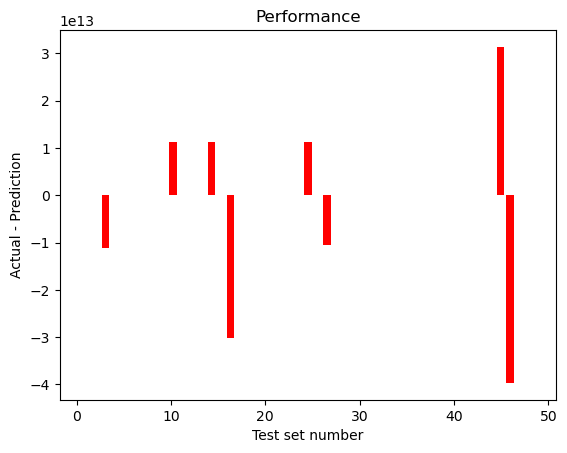

In [14]:
MLR(X_train, y_train, X_test, y_test)

[[  0.   5.]
 [  0.   4.]
 [  3.   6.]
 [  8.   0.]
 [ 20.  75.]
 [ 20.  34.]
 [ 10.  21.]
 [  6.   7.]
 [ 49.  70.]
 [ 20.  58.]
 [ 82.  12.]
 [ 44.  14.]
 [ 22.  20.]
 [ 58. 101.]
 [ 36.  30.]
 [  9.   9.]
 [ 12.  15.]
 [ 44.  41.]
 [108.  80.]
 [ 12.   2.]
 [ 90.  79.]
 [ 35.   6.]
 [ 11.  24.]
 [ 21.  73.]
 [  9.   0.]
 [ 42.  27.]
 [ 29.  38.]
 [  9.  25.]
 [ 23.  16.]
 [ 73.  35.]
 [ 67.  18.]
 [ 52.  31.]
 [ 14.   1.]
 [ 18.  10.]
 [ 54.  41.]
 [ 39.  12.]
 [  1.   8.]
 [ 48.  38.]
 [ 10.  16.]
 [  8.  16.]
 [  3.   1.]
 [  8.   1.]
 [ 30.  14.]
 [ 48. 100.]
 [ 42.   3.]
 [ 25.   8.]
 [  6.   9.]]
r2_score is 0.15893636217572382


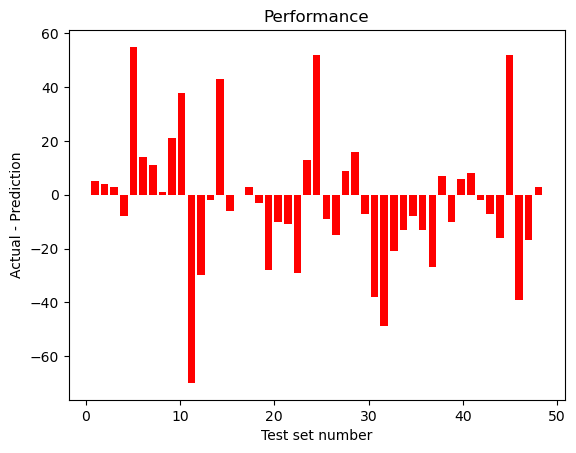

In [15]:
DT(X_train, y_train, X_test, y_test)

[[  7.5   5. ]
 [ 13.5   4. ]
 [  5.9   6. ]
 [  6.    0. ]
 [ 47.4  75. ]
 [ 38.1  34. ]
 [ 19.   21. ]
 [  7.1   7. ]
 [ 38.1  70. ]
 [ 41.5  58. ]
 [ 72.   12. ]
 [ 54.5  14. ]
 [ 28.8  20. ]
 [ 45.7 101. ]
 [ 36.2  30. ]
 [  7.    9. ]
 [ 25.   15. ]
 [ 38.6  41. ]
 [ 58.6  80. ]
 [ 15.5   2. ]
 [ 59.1  79. ]
 [ 38.6   6. ]
 [ 16.   24. ]
 [ 49.5  73. ]
 [  9.3   0. ]
 [ 36.6  27. ]
 [ 22.   38. ]
 [ 31.2  25. ]
 [ 27.4  16. ]
 [ 45.4  35. ]
 [ 51.9  18. ]
 [ 49.   31. ]
 [  9.4   1. ]
 [  7.6  10. ]
 [ 55.6  41. ]
 [ 39.9  12. ]
 [ 20.1   8. ]
 [ 63.2  38. ]
 [  6.8  16. ]
 [  9.1  16. ]
 [  5.1   1. ]
 [  5.9   1. ]
 [ 26.7  14. ]
 [ 51.8 100. ]
 [ 28.    3. ]
 [ 38.9   8. ]
 [ 17.6   9. ]]
r2_score is 0.36714622857213464


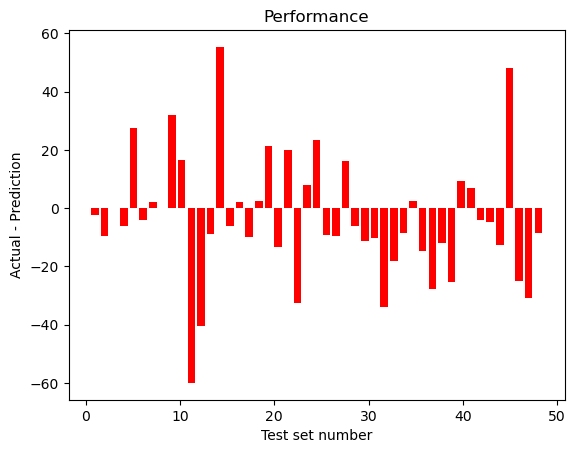

In [16]:
RF(X_train, y_train, X_test, y_test)

[[ 11.28   5.  ]
 [ -1.65   4.  ]
 [ 13.78   6.  ]
 [  5.7    0.  ]
 [ 42.31  75.  ]
 [ 39.91  34.  ]
 [ 24.39  21.  ]
 [  4.4    7.  ]
 [ 42.54  70.  ]
 [ 30.91  58.  ]
 [ 16.55  12.  ]
 [ 32.5   14.  ]
 [ 29.79  20.  ]
 [ 30.23 101.  ]
 [ 30.48  30.  ]
 [  9.13   9.  ]
 [ 19.71  15.  ]
 [ 41.61  41.  ]
 [ 49.01  80.  ]
 [  5.63   2.  ]
 [ 46.94  79.  ]
 [ 20.96   6.  ]
 [ 25.57  24.  ]
 [ 55.82  73.  ]
 [ -6.03   0.  ]
 [ 47.71  27.  ]
 [ 17.48  38.  ]
 [ 39.75  25.  ]
 [ 10.96  16.  ]
 [ 33.14  35.  ]
 [ 37.75  18.  ]
 [ 32.98  31.  ]
 [  7.33   1.  ]
 [ 19.14  10.  ]
 [ 61.61  41.  ]
 [ 37.26  12.  ]
 [ 25.15   8.  ]
 [ 36.68  38.  ]
 [  5.33  16.  ]
 [ 14.37  16.  ]
 [ 20.64   1.  ]
 [  4.55   1.  ]
 [ 28.44  14.  ]
 [ 60.8  100.  ]
 [  7.08   3.  ]
 [ 26.8    8.  ]
 [ 15.56   9.  ]]
r2_score is 0.521660867110729


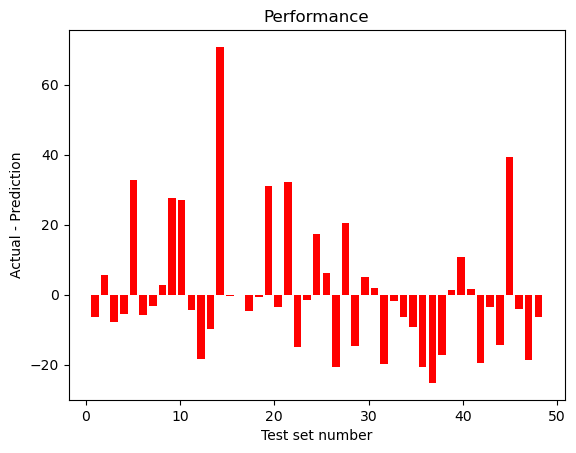

In [17]:
SVR(X_train, y_train, X_test, y_test)
